In [85]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import numpy as np
import operator

In [86]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [87]:
input="data\\Asian_4_1.png"

In [88]:
def euclid_distance(x,y):
    if (len(x) != len(y)):
        return None
    sq=0
    for i in range(len(x)):
        sq += (x[i] - y[i]) * (x[i] - y[i])
    return sq ** 0.5    

In [89]:
def get_vector(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    for rect in rects:
    # xác định facial landmarks for the face region sau đó convert các facial landmarks (x,y) về numpy array, mỗi hàng là một cặp tọa độ
        shape = predictor(gray, rect)   

        # chuyển về dạng numpy các coordinates
        shape = face_utils.shape_to_np(shape)   # numpy array (68, 2)

        # Chuyển dlib's rectange (left, top, right, botttom) = (xmin, ymin, xmax, ymax) to OpenCV-style bounding box (xmin, ymin, w, h)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)    # vẽ rectangle quanh khuôn mặt

        roi = image[y:y+h, x:x+w]
        
        # duyệt qua các coordinates of facial landmarks (x, y) và vẽ chúng lên ảnh
        for (i,( x, y)) in enumerate(shape):
            cv2.circle(image, (x, y), 1, (255, 255, 255), -1)
            cv2.putText(image,str(i),(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    embedding=[]   
    m0=np.max(shape,axis=0)
    m1=np.min(shape,axis=0)
    width=euclid_distance(shape[0],shape[16]) 
    height=m0[1]-m1[1]
    # Tính khoảng cách các điểm đến trung tâm mặt 
    embedding.append(euclid_distance(shape[36],shape[30])/width)
    embedding.append(euclid_distance(shape[39],shape[30])/width)
    embedding.append(euclid_distance(shape[42],shape[30])/width)
    embedding.append(euclid_distance(shape[45],shape[30])/width)
    embedding.append(euclid_distance(shape[48],shape[30])/width)
    embedding.append(euclid_distance(shape[54],shape[30])/width)
    
    #Tính kích thước mắt, mũi, miệng
    righteye=euclid_distance(shape[42],shape[45])/width
    lefteye=euclid_distance(shape[36],shape[39])/width
    mouth=euclid_distance(shape[48],shape[54])/width
    nose_w=euclid_distance(shape[31],shape[35])/width
    nose_h=euclid_distance(shape[30],shape[27])/height
    
    embedding.append(righteye)
    embedding.append(lefteye)
    embedding.append(mouth)
    embedding.append(nose_h)
    embedding.append(nose_w)
    #Tính màu trung bình
    average_color = cv2.mean(roi)[:3]
    average_color=[x/255 for x in average_color]
    embedding=embedding+average_color
    
    return embedding

In [90]:
import csv

In [91]:
# Đọc dữ liệu từ CSDL
data=[]
with open('database.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        data.append(lines)

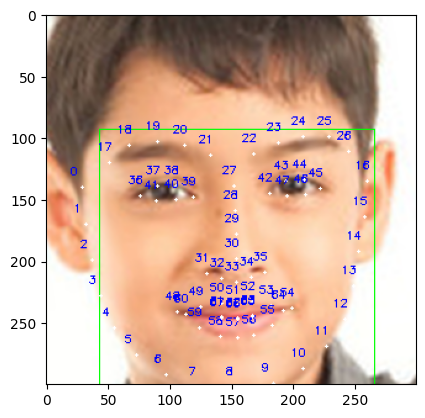

In [92]:
# Tính vector của ảnh input
a=get_vector(input)
v={}
# Tính khoảng cách với các vector trong CSDL
for lines in data:
    filename=lines[0]
    # print(filename,end=" ")
    vec=[float(i) for i in lines[1:15]]
    # print(euclid_distance(a,vec),end=" ")
    # print(vec)
    v[filename]=euclid_distance(a,vec)


In [93]:
# Kết quả
fig = plt.figure(figsize=(300, 300))
columns = 3
rows = 1
i=0
v=sorted(v.items(), key=operator.itemgetter(1))
for key,val in v[:3]:
    print ("Tên ảnh:"+key)
    print("Khoảng cách:"+str(val))
    print()
    i+=1
    fig.add_subplot(rows, columns, i)
    img=cv2.imread("data\\"+key)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show

Tên ảnh:Asian_4_1.png
Khoảng cách:0.0

Tên ảnh:Asian_4_0.png
Khoảng cách:0.0330638072314592

Tên ảnh:Caucasian_11_1.png
Khoảng cách:0.15053786381373965



<function matplotlib.pyplot.show(close=None, block=None)>